# 7-qubit Steane Error Correction 

In [1]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.quantum_info import Pauli, SparsePauliOp, Statevector
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit_aer import AerSimulator
from qiskit.circuit import Parameter, ParameterVector
import qiskit.qasm3
from qiskit_ibm_runtime.fake_provider import FakeVigoV2
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2 as Sampler, EstimatorV2 as Estimator, QiskitRuntimeService
from collections import Counter
from qiskit_aer import AerSimulator
from qiskit import transpile

In [2]:
print(f"Qiskit version: {qiskit.__version__}")

Qiskit version: 2.2.2


# Exercize: 1 Create the quantum circuit of encoded state of Steane error correction code 

The Steane code is a \([[7,1,3]]\) CSS code constructed from the classical \([7,4,3]\) Hamming code.

The logical basis states are defined as:

\[
\begin{aligned}
|0_L\rangle &= \tfrac{1}{\sqrt{8}}\big(
|0000000\rangle +
|1010101\rangle +
|0110011\rangle +
|1100110\rangle + \\
&\quad\quad
|0001111\rangle +
|1011010\rangle +
|0111100\rangle +
|1101001\rangle
\big), \\[1.2em]
|1_L\rangle &= X^{\otimes 7}|0_L\rangle \\
&= \tfrac{1}{\sqrt{8}}\big(
|1111111\rangle +
|0101010\rangle +
|1001100\rangle +
|0011001\rangle + \\
&\quad\quad
|1110000\rangle +
|0100101\rangle +
|1000011\rangle +
|0010110\rangle
\big).
\end{aligned}
\]


The Quantum Circuit to create the above code is given by 

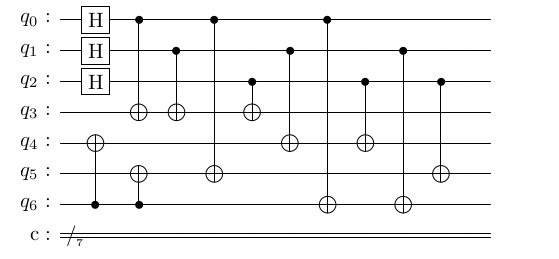

With the help of the above image  create the quantum circuit for creating the zero encoded state for the steane error correctiomn code

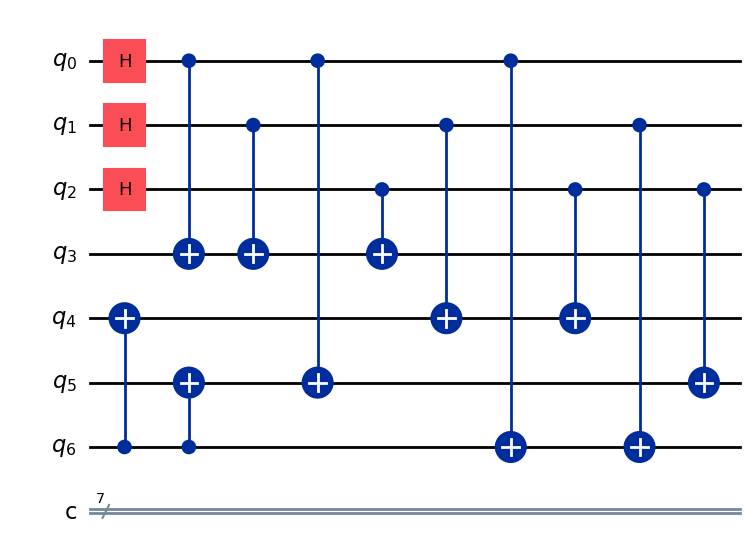

In [4]:
qc = QuantumCircuit(7, 7)

for i in range(0, 3):
    qc.h(i)

qc.cx(6, 4)
qc.cx(6, 5)

qc.cx(0, 3)
qc.cx(1, 3)
qc.cx(0, 5)
qc.cx(2, 3)
qc.cx(1, 4)
qc.cx(0, 6)
qc.cx(2, 4)
qc.cx(1, 6)
qc.cx(2, 5)

qc.draw("mpl")

# Exercize:2 Commute / Anti-commute Table (X errors)

**Tip:** Fill out the commute/anti-commute table below for the X errors!  
Mark **0** for *commute* and **1** for *anti-commute*.

**Stabilizers (Steane-like 7-qubit layout)**  
- \(S_5 = \mathrm{ZIZIZIZ}\)
- \(S_4 = \mathrm{IZZIIZZ}\)
- \(S_3 = \mathrm{IIIZZZZ}\)  
- \(S_2 = \mathrm{XIXIXIX}\)  
- \(S_1 = \mathrm{IXXIIXX}\)  
- \(S_0 = \mathrm{IIXXXXX}\)

> **How to read it:** Compare each error Pauli string with each stabilizer.  
> For each qubit position, X anticommutes with Z and Y; it commutes with I and X.  
> Overall parity “anti-commute (1)” if the number of per-site anticommutes is odd, else “commute (0)”.

### Table

| Error Code | Error Pauli String | \(S_5\) (ZIZIZIZ) | \(S_4\) (IZZIIZZ) | \(S_3\) (IIIZZZZ) | \(S_2\) (XIXIXIX) | \(S_1\) (IXXIIXX) | \(S_0\) (IIXXXXX) |
|---:|:------------------|:----------------:|:----------------:|:----------------:|:----------------:|:----------------:|:----------------:|
| \(X_0\) | `IIIIIIX` | **1** (anti-commute) | **1** (anti-commute) | **1** (anti-commute) | **0** (commute) | **0** (commute) | **0** (commute) |
| \(X_1\) | `IIIIIXI` |  |  |  |  |  |  |
| \(X_2\) | `IIIIXII` |  |  |  |  |  |  |
| \(X_3\) | `IIIXIII` |  |  |  |  |  |  |
| \(X_4\) | `IIXIIII` |  |  |  |  |  |  |
| \(X_5\) | `IXIIIII` |  |  |  |  |  |  |
| \(X_6\) | `XIIIIII` |  |  |  |  |  |  |




Fill the below '' with suitable binary strings

In [5]:
# ---- TODO : Task 2 --- COMPLETED
# Fill in the other error codes
steane_decoder_syndrome_map =  {
    '111000': 'X0',
     '011000': 'X1',
     '101000': 'X2',
     '001000': 'X3',
     '110000': 'X4',
     '010000': 'X5',
     '100000': 'X6',
     '111111': 'Y0',
     '011011': 'Y1',
     '101101': 'Y2',
     '001001': 'Y3',
     '110110': 'Y4',
     '010010': 'Y5',
     '100100': 'Y6',
     '000111': 'Z0',
     '000011': 'Z1',
     '000101': 'Z2',
     '000001': 'Z3',
     '000110': 'Z4',
     '000010': 'Z5',
     '000100': 'Z6',
     '000000': 'I'
}
# --- End of TODO ---

# Exercize:3 Create the circuit for error syndrome measurement 

The circuit for measuring the stabilizers are given below

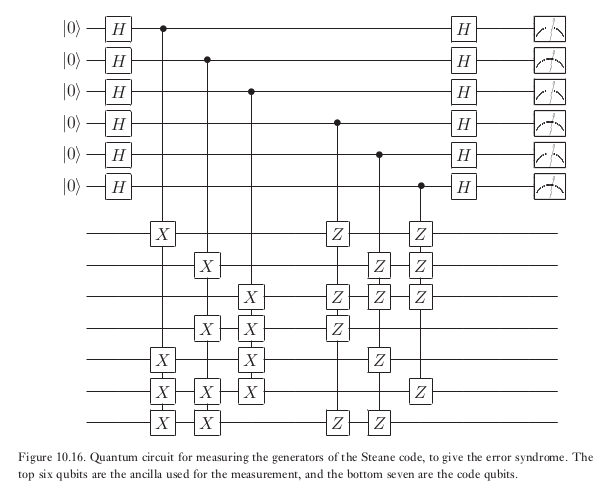

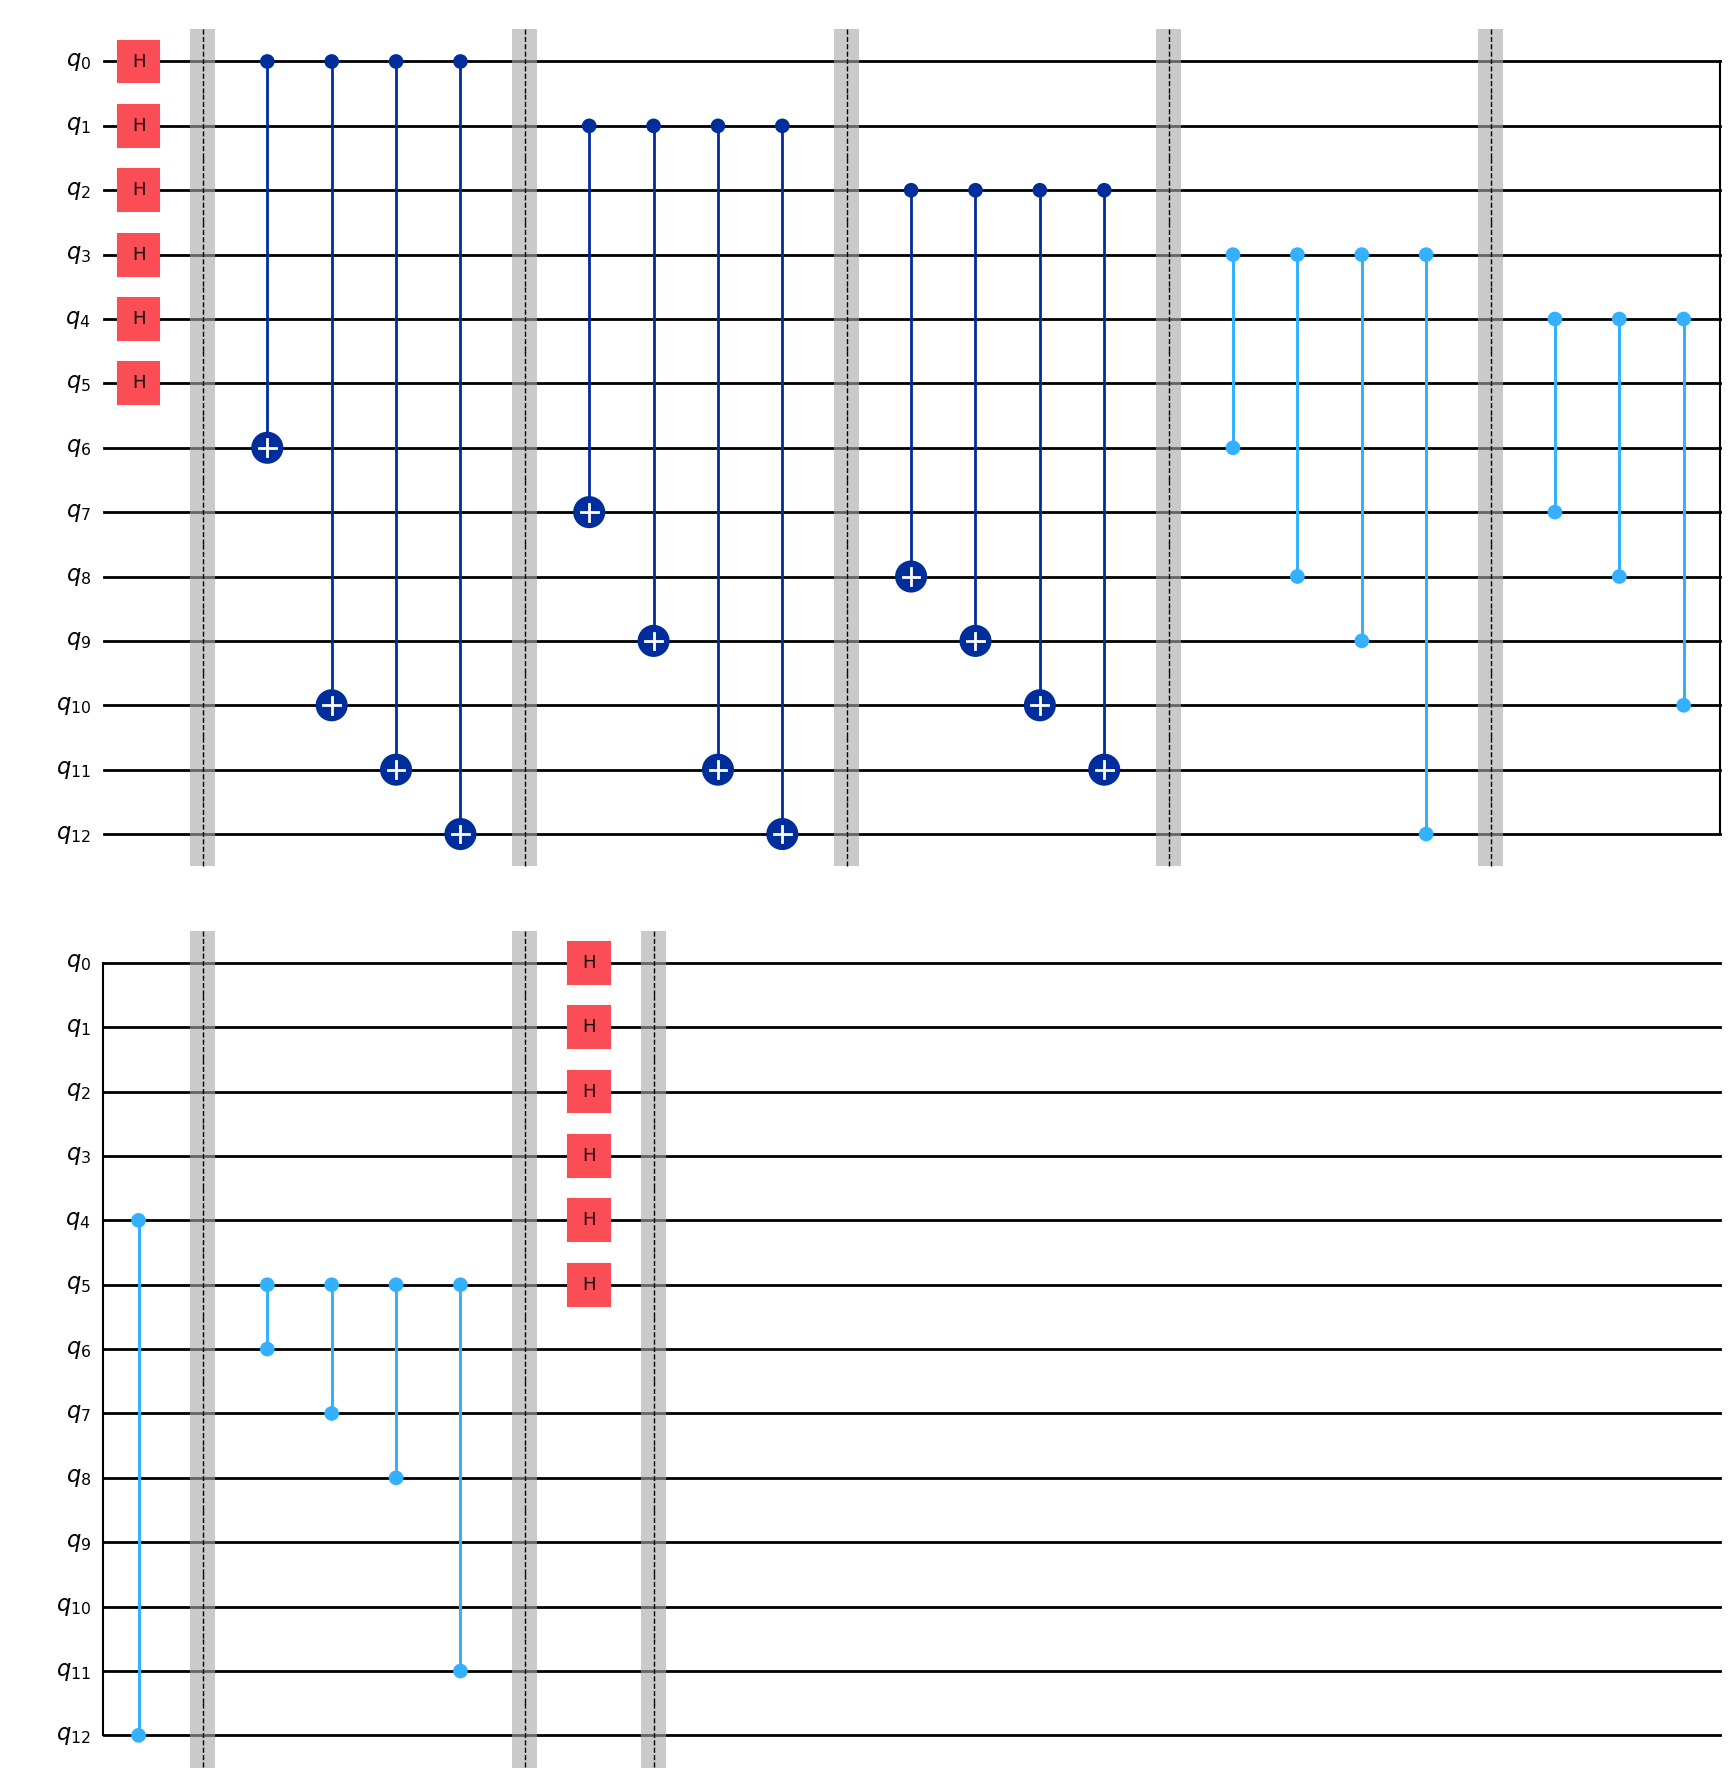

In [34]:
qc = QuantumCircuit(13)

for i in range(0, 6):
    qc.h(i)

qc.barrier()

qc.cx(0, 6)
qc.cx(0, 10)
qc.cx(0, 11)
qc.cx(0, 12)

qc.barrier()

qc.cx(1, 7)
qc.cx(1, 9)
qc.cx(1, 11)
qc.cx(1, 12)

qc.barrier()

qc.cx(2, 8)
qc.cx(2, 9)
qc.cx(2, 10)
qc.cx(2, 11)

qc.barrier()

qc.cz(3, 6)
qc.cz(3, 8)
qc.cz(3, 9)
qc.cz(3, 12)

qc.barrier()

qc.cz(4, 7)
qc.cz(4, 8)
qc.cz(4, 10)
qc.cz(4, 12)

qc.barrier()

qc.cz(5, 6)
qc.cz(5, 7)
qc.cz(5, 8)
qc.cz(5, 11)

qc.barrier()

for i in range(0, 6):
    qc.h(i)

qc.barrier()

qc.draw("mpl")